In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

### Data importation

In [2]:
data = pd.read_csv("emails.csv")

In [3]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


# Data preprocessing

In [4]:
data = data.drop('Email No.', axis = 1)
y = data.pop('Prediction')

In [5]:
X = data.values

In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### preprocessing for predictions

In [7]:
vocab = data.columns.tolist()

In [8]:
with open('vocab.pickle', 'wb') as f : 
    pickle.dump(vocab, f)
    f.close

In [9]:
def word_to_vec(phrase, vocab=vocab) :
    vec = np.zeros(len(vocab))
    word = phrase.split()
    
    for w in word : 
        if w in vocab : 
            indice = vocab.index(w)
            vec[indice] += 1 
            
    return np.array([vec])

### Split data

In [10]:
x_train, x_test, y_train, y_test =train_test_split(X,y, test_size = 0.2, random_state = 16) 

# SVM model

### training

In [11]:
model = SVC()

In [12]:
model.fit(x_train,y_train)

SVC()

In [13]:
model.score(x_train, y_train)

0.9840464104423495

In [14]:
predictions = model.predict(x_test)

### metrics

In [15]:
#accuracy
accuracy = accuracy_score(predictions, y_test)
print(f"accuracy for SVM : {round(accuracy, 2) * 100}%")

accuracy for SVM : 95.0%


In [16]:
#precision
precision = precision_score(predictions,y_test)
print(f"precision for SVM : {round(precision, 4) * 100}%")

precision for SVM : 85.48%


In [17]:
#recall
recall = recall_score(predictions,y_test)
print(f"recall for SVM : {round(recall, 3) * 100}%")

recall for SVM : 97.8%


In [18]:
#f1 score
f1 = f1_score(predictions, y_test)
print(f"f1_score for SVM : {round(f1, 4)*100}%")

f1_score for SVM : 91.22%


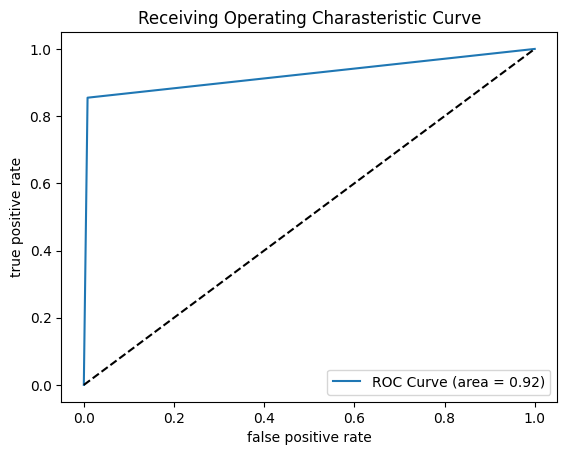

In [19]:
#courbe ROC

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr,tpr)

#Affichage de la courbe
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' %roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiving Operating Charasteristic Curve')
plt.legend(loc='lower right')
plt.show()

# RandomForest model

### training

In [20]:
model2 = RandomForestClassifier()

In [21]:
model2.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
model2.score(x_train,y_train)

1.0

In [23]:
predictions2 = model2.predict(x_test)

### metrics

In [24]:
#accuracy
accuracy2 = accuracy_score(predictions2, y_test)
print(f"accuracy for RandomForest : {round(accuracy2,4) * 100}%")

accuracy for RandomForest : 97.49%


In [25]:
precision2 = precision_score(predictions2,y_test)
print(f"precision for RandomForest : {round(precision2, 4) * 100}%")

precision for RandomForest : 95.81%


In [26]:
#recall
recall2 = recall_score(predictions2,y_test)
print(f"recall for RandomForest : {round(recall2, 4) * 100}%")

recall for RandomForest : 95.81%


In [27]:
#f1 score
f1_2 = f1_score(predictions2, y_test)
print(f"f1_score for RandomForest : {round(f1_2, 4)*100}%")

f1_score for RandomForest : 95.81%


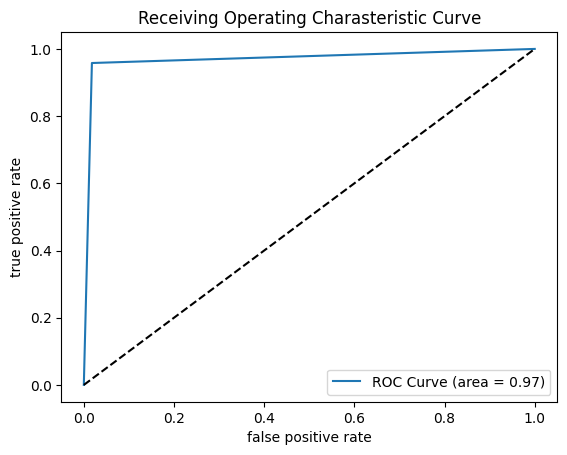

In [28]:
#courbe ROC

fpr, tpr, thresholds = roc_curve(y_test, predictions2)
roc_auc = auc(fpr,tpr)

#Affichage de la courbe
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' %roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiving Operating Charasteristic Curve')
plt.legend(loc='lower right')
plt.show()

In [29]:
with open('model_pickle', 'wb') as f : 
    pickle.dump(model2, f)